# 0. 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_csv("../data/hr_data_preprocessing.csv", encoding="utf-8", index_col=0)

# 1. correlation

In [5]:
df.columns

Index(['birthday', 'entry_year', 'department', 'marital_status',
       'performance_rating', 'job_satisfaction', 'working_hours', 'salary',
       'last_year_salary', 'num_companies_worked', 'attrition', 'birth_year',
       'age', 'years_at_company', 'salary_increasing_rate', 'department_hr',
       'department_rnd', 'department_sales', 'marital_status_etc',
       'marital_status_married', 'marital_status_single'],
      dtype='object')

In [6]:
numerical_col = ["working_hours",
                 "num_companies_worked",
                 "salary",
                 "last_year_salary",
                 "age",
                 "years_at_company", 
                 "salary_increasing_rate"]

df[numerical_col].corr()

,working_hours,num_companies_worked,salary,last_year_salary,age,years_at_company,salary_increasing_rate
working_hours,1.000000,0.073281,0.268553,0.269088,0.041108,0.026069,-0.008055
num_companies_worked,0.073281,1.000000,0.043742,0.042641,0.264777,0.199938,0.009242
salary,0.268553,0.043742,1.000000,0.998285,0.037100,0.007591,-0.014821
last_year_salary,0.269088,0.042641,0.998285,1.000000,0.032793,0.005606,-0.070527
age,0.041108,0.264777,0.037100,0.032793,1.000000,0.681934,0.059222
years_at_company,0.026069,0.199938,0.007591,0.005606,0.681934,1.000000,0.021076
salary_increasing_rate,-0.008055,0.009242,-0.014821,-0.070527,0.059222,0.021076,1.000000


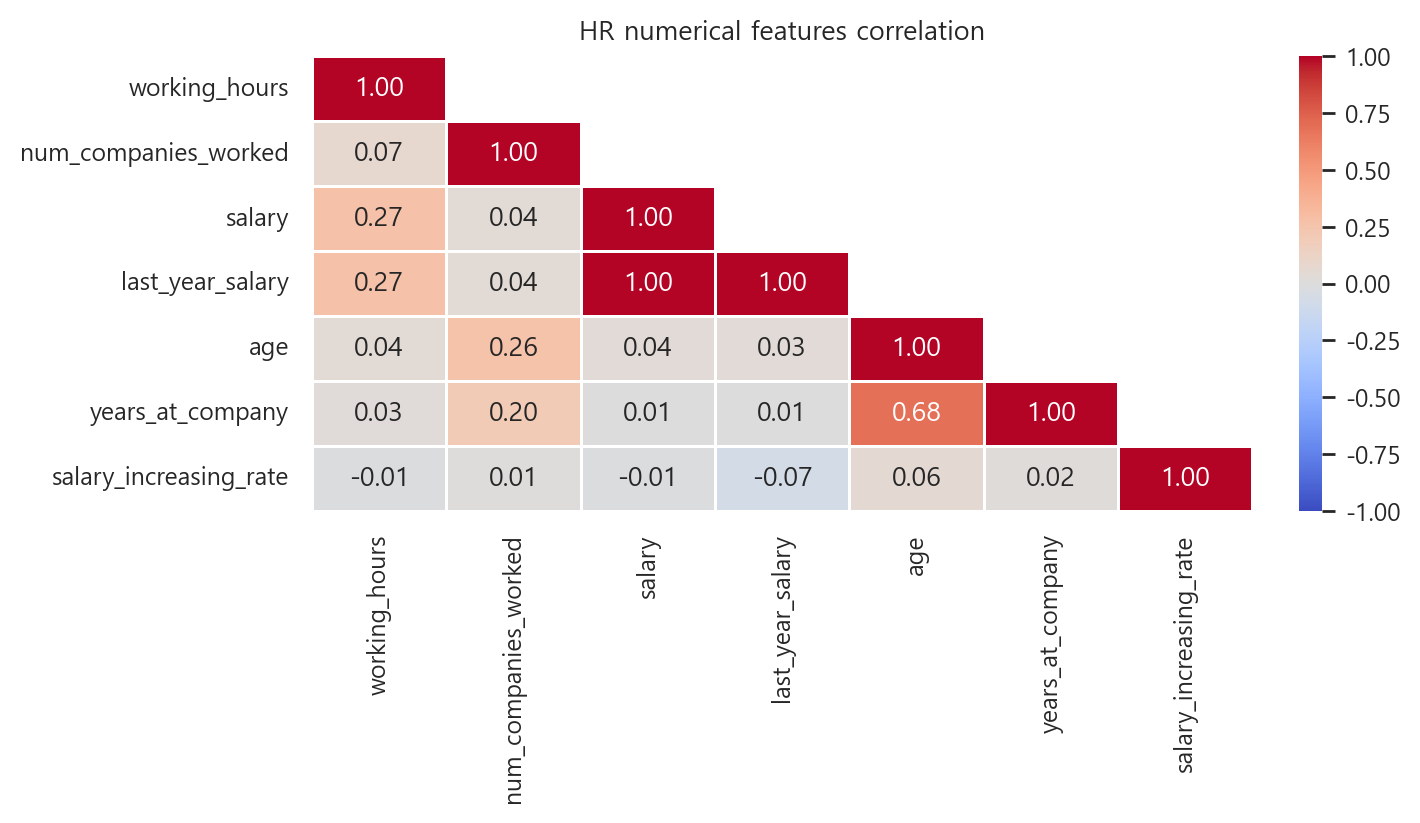

In [7]:
## numerical feature의 correlation을 시각화하시오.
## heatmap의 대각선 아래부분만 나오도록 그리시오.

corr = df[numerical_col].corr().to_numpy()
mask = np.triu(np.ones_like(corr), k=1)

fig, ax = plt.subplots(figsize=(7,4))

sns.heatmap(df[numerical_col].corr(method = "pearson"), 
            annot = True,
            fmt = ".2f",
            cmap = "coolwarm", 
            vmin = -1, 
            vmax = 1,
            linewidths = 1,
            linecolor = "white",
            mask = mask)

ax.set_title("HR numerical features correlation");

In [8]:
df[numerical_col].corr()

,working_hours,num_companies_worked,salary,last_year_salary,age,years_at_company,salary_increasing_rate
working_hours,1.000000,0.073281,0.268553,0.269088,0.041108,0.026069,-0.008055
num_companies_worked,0.073281,1.000000,0.043742,0.042641,0.264777,0.199938,0.009242
salary,0.268553,0.043742,1.000000,0.998285,0.037100,0.007591,-0.014821
last_year_salary,0.269088,0.042641,0.998285,1.000000,0.032793,0.005606,-0.070527
age,0.041108,0.264777,0.037100,0.032793,1.000000,0.681934,0.059222
years_at_company,0.026069,0.199938,0.007591,0.005606,0.681934,1.000000,0.021076
salary_increasing_rate,-0.008055,0.009242,-0.014821,-0.070527,0.059222,0.021076,1.000000


In [9]:
contain_ord_col = ["working_hours",
                 "num_companies_worked",
                 "salary",
                 "age",
                 "years_at_company", 
                 "salary_increasing_rate",
                 "job_satisfaction",
                 "performance_rating"]

df[contain_ord_col ].corr()

,working_hours,num_companies_worked,salary,age,years_at_company,salary_increasing_rate,job_satisfaction,performance_rating
working_hours,1.000000,0.073281,0.268553,0.041108,0.026069,-0.008055,-0.006563,-0.014896
num_companies_worked,0.073281,1.000000,0.043742,0.264777,0.199938,0.009242,-0.033059,-0.012340
salary,0.268553,0.043742,1.000000,0.037100,0.007591,-0.014821,-0.070285,-0.008416
age,0.041108,0.264777,0.037100,1.000000,0.681934,0.059222,-0.002732,0.002102
years_at_company,0.026069,0.199938,0.007591,0.681934,1.000000,0.021076,-0.020383,0.004655
salary_increasing_rate,-0.008055,0.009242,-0.014821,0.059222,0.021076,1.000000,0.000828,0.737408
job_satisfaction,-0.006563,-0.033059,-0.070285,-0.002732,-0.020383,0.000828,1.000000,-0.001474
performance_rating,-0.014896,-0.012340,-0.008416,0.002102,0.004655,0.737408,-0.001474,1.000000


In [10]:
df[contain_ord_col ].corr(method = "spearman")

,working_hours,num_companies_worked,salary,age,years_at_company,salary_increasing_rate,job_satisfaction,performance_rating
working_hours,1.000000,0.075024,0.250418,0.047416,0.036806,-0.013535,-0.008775,-0.013984
num_companies_worked,0.075024,1.000000,0.038882,0.343390,0.289202,0.016676,-0.024323,-0.011679
salary,0.250418,0.038882,1.000000,0.041455,-0.000870,-0.014481,-0.068896,-0.005804
age,0.047416,0.343390,0.041455,1.000000,0.658134,0.028303,-0.003280,0.000034
years_at_company,0.036806,0.289202,-0.000870,0.658134,1.000000,-0.002890,-0.016650,0.009358
salary_increasing_rate,-0.013535,0.016676,-0.014481,0.028303,-0.002890,1.000000,0.014026,0.625539
job_satisfaction,-0.008775,-0.024323,-0.068896,-0.003280,-0.016650,0.014026,1.000000,0.003118
performance_rating,-0.013984,-0.011679,-0.005804,0.000034,0.009358,0.625539,0.003118,1.000000


# 2. 훈련 데이터와 테스트 데이터로 나누기

In [11]:
features = ["job_satisfaction",
            "working_hours", 
            "num_companies_worked", 
            "age", 
            "years_at_company",
            "salary_increasing_rate",
            "department_hr", 
            "department_rnd", 
            "department_sales",
            "marital_status_etc", 
            "marital_status_married", 
            "marital_status_single"]

In [12]:
x_data = df[features]
y_data = df["attrition"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.25,
                                                    random_state = 42, 
                                                    stratify=y_data)

In [19]:
print("test 데이터의 비율:", len(y_test)/len(df))

test 데이터의 비율: 0.25017135023989034


In [20]:
## 전체 데이터에서 퇴직자의 비율을 계산하시오.
## 테스트 데이터에서 퇴직자의 비율을 계산하시오.
print("전체 데이터의 퇴직자 비율:", y_data.sum()/len(df))
print("test 데이터의 퇴직자 수:", y_test.sum())
print("test 데이터의 퇴직자 비율:", y_test.sum()/len(y_test))

전체 데이터의 퇴직자 비율: 0.16038382453735436
test 데이터의 퇴직자 수: 68
test 데이터의 퇴직자 비율: 0.1863013698630137


In [21]:
train_indx = x_train.index
test_indx = x_test.index

# 3. 데이터 스케일링

* test 데이터는 절대! 포함하면 안됨!!!

In [22]:
minmax_scaler = MinMaxScaler()
x_train = minmax_scaler.fit_transform(x_train)

In [23]:
x_train_scaled = pd.DataFrame(x_train, columns=features, index=train_indx)

In [24]:
# 주의!! fit_transform 아님!! transform임!!!
x_test = minmax_scaler.transform(x_test)

In [25]:
x_test_scaled = pd.DataFrame(x_test, columns=features, index=test_indx)

In [26]:
train = x_train_scaled.merge(y_train, left_index=True, right_index=True)
test = x_test_scaled.merge(y_test, left_index=True, right_index=True)

In [27]:
train

,job_satisfaction,working_hours,num_companies_worked,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single,attrition
853,0.000000,0.111588,0.111111,0.023810,0.025,0.998459,0.0,1.0,0.0,0.0,0.0,1.0,0
815,0.333333,0.227468,0.222222,0.071429,0.050,0.444102,0.0,1.0,0.0,0.0,0.0,1.0,0
1394,1.000000,0.484979,0.888889,0.333333,0.200,0.938319,0.0,1.0,0.0,0.0,0.0,1.0,0
1068,0.000000,0.484979,0.777778,0.238095,0.200,0.437935,0.0,1.0,0.0,0.0,0.0,1.0,1
958,1.000000,0.000000,0.000000,0.380952,0.250,0.430224,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.666667,0.613734,0.888889,0.714286,0.450,0.575173,0.0,0.0,1.0,1.0,0.0,0.0,0
1138,0.666667,0.000000,0.222222,0.761905,0.800,0.596763,0.0,1.0,0.0,0.0,1.0,0.0,0
1304,0.000000,0.712446,0.222222,0.523810,0.375,0.489591,0.0,1.0,0.0,1.0,0.0,0.0,0
866,0.333333,0.000000,0.555556,0.523810,0.125,0.468774,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
# 저장
# train.to_csv("../data/hr_train_scaling.csv", encoding="utf-8")
# test.to_csv("../data/hr_test_scaling.csv", encoding="utf-8")